# Exercise 4 - EM and doping

* Banned substance 'X' can't be measured in blood samples directly but a positive correlation between substance x_1 and x_2 tends to show the abuse of substance 'X' 
* $x_1$ and $x_2$ can not be measured confidently but measuring $x_3$ and $x_4$ can show to which class a sample belongs
* **Abusive athletes** = positive correlation between $x_1$ and $x_2$
* **Clean athletes** = no correlation or negative correlation between $x_1$ and $x_2$

**Classes**

* $c_1$ = positive correlation
* $c_2$ = no correlation
* $c_3$ = negative correlation

Certain values for $x_3$ and $x_4$ are typical for one class but highly unusual for others

**Samples**

* 2000 samples
* Estimation for $c_1$: $P(c_1) <= 0.2$
* Blood sample measurement modelled as mixture of $K$ gaussians for each class. $K = [c_1, c_2, c_3]$


\begin{equation}
p(x | \mu, \Sigma, \pi) = \sum^K_{k = 1} \pi_k \mathcal{N}(x | \mu_k, \sigma_k)
\end{equation}

* Values for the measure quantities in the blood: $x = [x_1, x_2, x_3, x_4]$
* Means of the Gaussians for each class: $\mu = [\mu_1,...,\mu_K]$
* Covariance matrices of Gaussian for each class: $\Sigma = [\sigma_1, ..., \sigma_K]$
* Mixing coefficients in the overall data set: $\pi = [\pi_1,..., \pi_K]$

In [158]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
%matplotlib inline

Number of data points 'N': 2000
Number of variables 'D': 4
Mean of x_1: 11.8984181195
Mean of x_1: 1.9129965287477
Mean of x_1: 0.37928800998915
Mean of x_1: 3.7035525292735003
Min and max of x_1: 11.315281, 12.37204
Min and max of x_2: -4.8354242, 4.8635103
Min and max of x_3: -2.9653298, 3.1605988
Min and max of x_4: -3.2219019, 10.582742


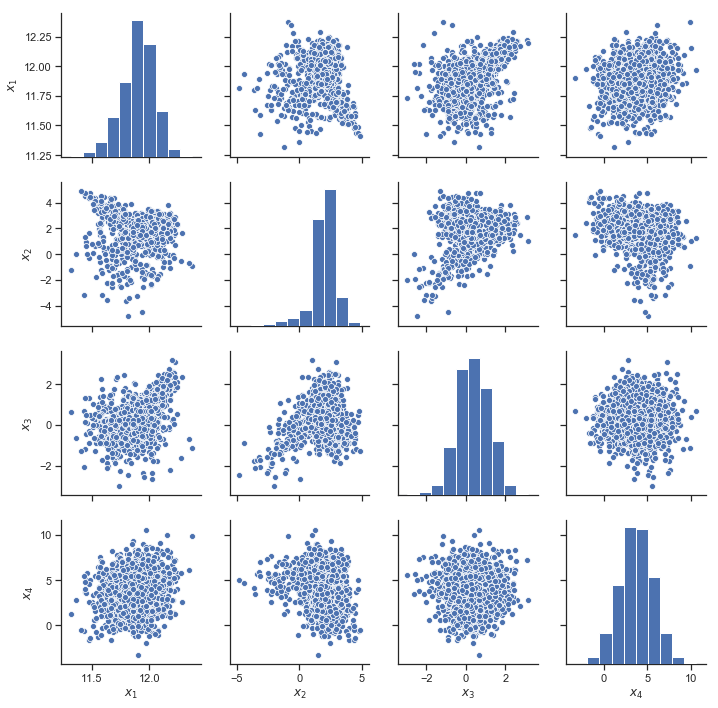

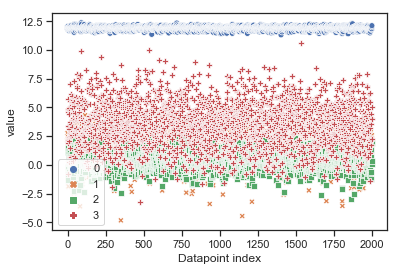

In [189]:
# Exercise 4.1

data = np.loadtxt("data/a011_mixdata.txt")

N = data.shape[0]
print("Number of data points 'N': {}".format(N))

D = data.shape[1]
print("Number of variables 'D': {}".format(D))

mean_1 = np.mean(data[:,0], axis=0)
mean_2 = np.mean(data[:,1], axis=0)
mean_3 = np.mean(data[:,2], axis=0)
mean_4 = np.mean(data[:,3], axis=0)

print("Mean of x_1: {}".format(mean_1))
print("Mean of x_1: {}".format(mean_2))
print("Mean of x_1: {}".format(mean_3))
print("Mean of x_1: {}".format(mean_4))

min_1 = np.min(data[:,0])
max_1 = np.max(data[:,0])
min_2 = np.min(data[:,1])
max_2 = np.max(data[:,1])
min_3 = np.min(data[:,2])
max_3 = np.max(data[:,2])
min_4 = np.min(data[:,3])
max_4 = np.max(data[:,3])
print("Min and max of x_1: {}, {}".format(min_1, max_1))
print("Min and max of x_2: {}, {}".format(min_2, max_2))
print("Min and max of x_3: {}, {}".format(min_3, max_3))
print("Min and max of x_4: {}, {}".format(min_4, max_4))

# See: https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Pairplot shows you the correlation between two variables
# The diagonal just shows the histogram of one variable
df = pd.DataFrame(data, columns=["$x_1$", "$x_2$", "$x_3$", "$x_4$"])
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.savefig('figure_4_1_a.png')
plt.show()


sns.scatterplot(data=data)
plt.xlabel('Datapoint index')
plt.ylabel('value')
plt.savefig('figure_4_1_b.png')
plt.show()

## 4.2 - EM algorithm for Gaussian  Mixtures

1. Initialize the **means** $\mu_k$, **covariances** $\Sigma_k$ and **mixing coefficients** $\pi_k$ and evaluate the initial value for the **log likelihood**.

2. **E-step**. Evaluate the **responsibilities** using the current parameter values

\begin{equation}
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)})
\end{equation}


3. **M-step**. Re-estimate the parameters using the current responsibilities

\begin{equation}
\mu_k^{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) x_n\\
\Sigma_k^{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T\\
\pi_k^{new} = \frac{N_k}{N}
\end{equation}

where

\begin{equation}
N_k = \sum_{n=1}^N \gamma(z_{nk})
\end{equation}

4. Evaluate the **log likelihood**

\begin{equation}
\ln p(X | \mu, \Sigma, \pi) = \sum_{n = 1}^N \ln \left\{ \sum_{k = 1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right\}
\end{equation}

and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.

Initial log likelihood: -14250.8131
Iteration 1: Log likelihood = -7932.22
Difference of log likelihoods: 6318.59086

Iteration 2: Log likelihood = -7532.94
Difference of log likelihoods: 399.28716

Iteration 3: Log likelihood = -7184.43
Difference of log likelihoods: 348.50299

Iteration 4: Log likelihood = -6972.13
Difference of log likelihoods: 212.30015

Iteration 5: Log likelihood = -6775.66
Difference of log likelihoods: 196.46861

Iteration 6: Log likelihood = -6645.27
Difference of log likelihoods: 130.39395

Iteration 7: Log likelihood = -6583.15
Difference of log likelihoods: 62.12094

Iteration 8: Log likelihood = -6551.93
Difference of log likelihoods: 31.21639

Iteration 9: Log likelihood = -6531.75
Difference of log likelihoods: 20.18563

Iteration 10: Log likelihood = -6513.83
Difference of log likelihoods: 17.91444

Iteration 11: Log likelihood = -6492.96
Difference of log likelihoods: 20.86733

Iteration 12: Log likelihood = -6462.50
Difference of log likelihoods: 30.4

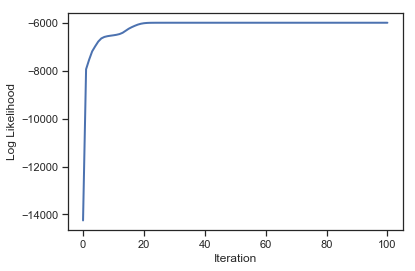

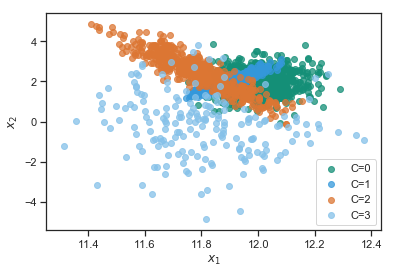

In [214]:
# Exercise 4.2

def gaussian(x, mu, sigma):
    '''
    Implementation of the gaussian pdf from scratch because scipy throws LinAlgErr when
    covariance matrix is near singular when using multivariate_normal
    See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
    '''
    normalizer = 1. / (2*np.pi)**(x.shape[0]/2) * 1. / np.sqrt(np.linalg.det(sigma))
    return normalizer * np.exp(-1./2 * np.dot(x - mu, np.dot(np.linalg.inv(sigma), x - mu)))

def calculate_log_likelihood(data, pi, mu, sigma, K):
    return np.sum([np.log(np.sum([pi[k] * gaussian(x, mu[k], sigma[k]) for k in range(0, K)])) for x in data])


def expectation_maximization(data, K, iterations=100, early_stopping=False, epsilon=0.01):
    # ******1. Initialize values and evaluate log likelihood ****** 
    
    N = data.shape[0]
    D = data.shape[1]
    
    # equally likely mixing coefficients
    pi = np.ones(K)/K 
    # means, random values around the sample means from -1 to +1
    mu = np.random.uniform(-1, 1, size=(K, D)) + data.mean(axis=0) 
    # covariance matrices, diagonal matrices with variance = 4 * random + 2
    sigma = [np.diagflat(np.random.rand(1, data.shape[1]) * 4 + 2) for _ in range(0, K)]
    # responsibilities initiated to 0
    gamma = np.zeros((data.shape[0], K))
    
    log_likelihoods = []
    
    log_likelihoods.append(calculate_log_likelihood(data, pi, mu, sigma, K))
    print("Initial log likelihood: {:.4f}".format(log_likelihoods[0]))
    
    for i in range(1, iterations+1):
    
        
        # ****** 2. E-step: evaluate responsibilities ****** 
        for k in range(0, K):
            gamma[:, k] = [pi[k] * gaussian(sample, mu[k], sigma[k]) for sample in data]

        gamma = gamma / np.repeat(np.sum(gamma, 1)[np.newaxis], K, axis=0).T
    

        # ****** 3. M-step: Re-estimate parameters ****** 
        N_k = np.sum(gamma, 0)
        
        for k in range(0, K):
            mu[k] = 1./N_k[k] * np.dot(gamma[:, k], data)
            sigma[k] = 1./N_k[k] * np.dot(gamma[:, k], (data - mu[k])[np.newaxis].T * (data - mu[k])[np.newaxis])

        pi = N_k / N
        
        
        # ****** 4. Evaluate log likelihood ****** 

        log_likelihoods.append(calculate_log_likelihood(data, pi, mu, sigma, K))
        print("Iteration {:d}: Log likelihood = {:.2f}".format(i, log_likelihoods[i]))
        print("Difference of log likelihoods: {:.5f}\n".format(np.abs(log_likelihoods[i-1] - log_likelihoods[i])))
        
        if early_stopping:
            if np.abs(log_likelihoods[i-1] - log_likelihoods[i]) < epsilon:
                print("Converged after {} iterations.".format(i))
                break   
    
    return pi, mu, sigma, gamma, log_likelihoods
        
        
        
def calculate_log_likelihood_with_loops(data_points, mixing_coefficients, means, covariances, number_of_classes, number_of_dimensions):
    # not used anymore and way too slow
    outer_sum = 0
    number_of_data_points = data_points.shape[0]
    for data_index in range(number_of_data_points):
        inner_sum = 0
        for class_index in range(number_of_classes):
                inner_sum += mixing_coefficients[class_index] * gaussian(
                    data_points[data_index],
                    means[class_index],
                    covariances[class_index]
                )
        outer_sum += np.log(inner_sum)
    print("Log likelihood {}".format(outer_sum))
    
def singularity_collapse_check(data_points, means, covariances, number_of_classes, number_of_dimensions):
    # not used anymore
    for k in range(number_of_classes):
        
        reinit_required = False
    
        try:
            i = np.linalg.inv(covariances[k])
        except np.linalg.LinAlgError as err:
            print("LinAlgErr")
            reinit_required = True

        if np.isnan(covariances[k]).any() or not np.isfinite(covariances[k]).any():
            print("NaN or infinite")
            reinit_required = True
            
        if not covariances[k].shape[0] == covariances[k].shape[1] and np.linalg.matrix_rank(covariances[k]) == covariances[k].shape[0]:
            reinit_required = True


        if reinit_required:
            print("Heading towards singularity collapse. ")   
            init_mean_and_covariance(data_points, means[k], covariances[k], number_of_classes, number_of_dimensions)    
    

def init_mean_and_covariance(data_points, mean, covariance, number_of_classes, number_of_dimensions):
    # not used anymore
    print("Re-initializing mean and covariance matrix for component...")
    covariance = np.ones( (number_of_dimensions, number_of_dimensions) ) * (4*np.random.rand(number_of_dimensions) + 2) * np.eye(number_of_dimensions) 
    mean = np.random.uniform(-1, 1, size=(number_of_dimensions)) + data_points.mean(axis=0)     

    
K = 4    
    
pi, mu, sigma, gamma, log_likelihoods = expectation_maximization(data, K)

# *** Plotting ***
log_likelihood_range = range(0, len(log_likelihoods))
plt.plot(log_likelihood_range, log_likelihoods, linewidth=2, linestyle="-")
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.savefig('figure_4_2_log_likelihoods.png')
plt.show()
    
colors = ['#148F77', '#3498DB', '#DC7633', '#85C1E9']

plt.figure()
# 'Predictions' are just based on the responsibilities/gammas
for k, color in zip(range(K), colors):
    plt.scatter(data[np.argmax(gamma, 1)==k, 0], data[np.argmax(gamma, 1)==k, 1], alpha = 0.75, c=color, label='C=%d'%k)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figure_4_2_resp.png')
plt.show()



Initial log likelihood: -14634.5947
Iteration 1: Log likelihood = -8013.61
Difference of log likelihoods: 6620.98488

Iteration 2: Log likelihood = -7738.33
Difference of log likelihoods: 275.27509

Iteration 3: Log likelihood = -7292.74
Difference of log likelihoods: 445.59462

Iteration 4: Log likelihood = -7103.57
Difference of log likelihoods: 189.16577

Iteration 5: Log likelihood = -7072.50
Difference of log likelihoods: 31.07669

Iteration 6: Log likelihood = -7065.53
Difference of log likelihoods: 6.96650

Iteration 7: Log likelihood = -7062.39
Difference of log likelihoods: 3.14439

Iteration 8: Log likelihood = -7060.65
Difference of log likelihoods: 1.73304

Iteration 9: Log likelihood = -7059.68
Difference of log likelihoods: 0.97781

Iteration 10: Log likelihood = -7059.12
Difference of log likelihoods: 0.55775

Iteration 11: Log likelihood = -7058.79
Difference of log likelihoods: 0.32566

Iteration 12: Log likelihood = -7058.60
Difference of log likelihoods: 0.19720

Ite

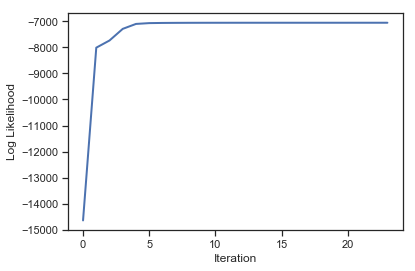

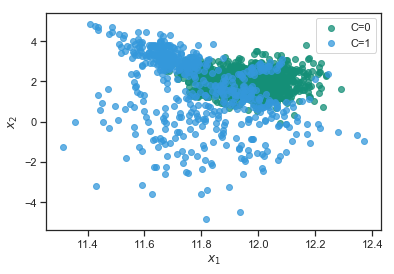

Correlation between x1 and x2: [-0.053114125960114736, -0.3261342187082011]


In [215]:
# Exercise 4.3

K = 2

pi, mu, sigma, gamma, log_likelihoods = expectation_maximization(data, K, early_stopping=True)

# *** Plotting ***
log_likelihood_range = range(0, len(log_likelihoods))
plt.plot(log_likelihood_range, log_likelihoods, linewidth=2, linestyle="-")
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.savefig('figure_4_3_log_likelihoods.png')
plt.show()
    
colors = ['#148F77', '#3498DB', '#DC7633', '#85C1E9']

plt.figure()
# 'Predictions' are just based on the responsibilities/gammas
for k, color in zip(range(K), colors):
    plt.scatter(data[np.argmax(gamma, 1)==k, 0], data[np.argmax(gamma, 1)==k, 1], alpha = 0.75, c=color, label='C=%d'%k)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figure_4_3_resp.png')
plt.show()


correlation = [sigma[k][0, 1] / np.sqrt(sigma[k][0, 0] * sigma[k][1, 1]) for k in range(0, K)]
print("Correlation between x1 and x2: {}".format(correlation))

Initial log likelihood: -14405.4019
Iteration 1: Log likelihood = -7753.88
Difference of log likelihoods: 6651.52375

Iteration 2: Log likelihood = -7269.47
Difference of log likelihoods: 484.40539

Iteration 3: Log likelihood = -6979.89
Difference of log likelihoods: 289.58058

Iteration 4: Log likelihood = -6802.51
Difference of log likelihoods: 177.38628

Iteration 5: Log likelihood = -6685.67
Difference of log likelihoods: 116.83511

Iteration 6: Log likelihood = -6620.99
Difference of log likelihoods: 64.67648

Iteration 7: Log likelihood = -6589.28
Difference of log likelihoods: 31.71548

Iteration 8: Log likelihood = -6572.56
Difference of log likelihoods: 16.72233

Iteration 9: Log likelihood = -6563.25
Difference of log likelihoods: 9.30248

Iteration 10: Log likelihood = -6558.05
Difference of log likelihoods: 5.20073

Iteration 11: Log likelihood = -6555.13
Difference of log likelihoods: 2.92190

Iteration 12: Log likelihood = -6553.47
Difference of log likelihoods: 1.66161


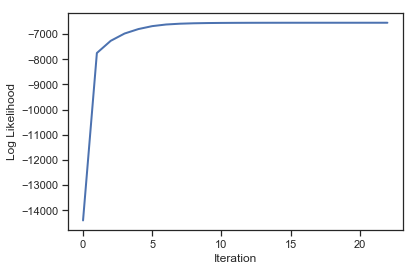

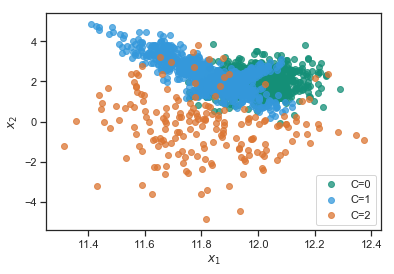

Correlation between x1 and x2: [0.08087460101865655, -0.7230732922604372, -0.014620843890103857]


In [216]:
# Exercise 4.4a

K = 3

pi, mu, sigma, gamma, log_likelihoods = expectation_maximization(data, K, early_stopping=True)

# *** Plotting ***
log_likelihood_range = range(0, len(log_likelihoods))
plt.plot(log_likelihood_range, log_likelihoods, linewidth=2, linestyle="-")
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.savefig('figure_4_4_a_log_likelihoods.png')
plt.show()
    
colors = ['#148F77', '#3498DB', '#DC7633', '#85C1E9']

plt.figure()
# 'Predictions' are just based on the responsibilities/gammas
for k, color in zip(range(K), colors):
    plt.scatter(data[np.argmax(gamma, 1)==k, 0], data[np.argmax(gamma, 1)==k, 1], alpha = 0.75, c=color, label='C=%d'%k)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figure_4_4_a_resp.png')
plt.show()


correlation = [sigma[k][0, 1] / np.sqrt(sigma[k][0, 0] * sigma[k][1, 1]) for k in range(0, K)]
print("Correlation between x1 and x2: {}".format(correlation))

Initial log likelihood: -14210.8106
Iteration 1: Log likelihood = -8024.17
Difference of log likelihoods: 6186.64241

Iteration 2: Log likelihood = -7758.27
Difference of log likelihoods: 265.89530

Iteration 3: Log likelihood = -7406.53
Difference of log likelihoods: 351.74605

Iteration 4: Log likelihood = -7138.78
Difference of log likelihoods: 267.75092

Iteration 5: Log likelihood = -6907.20
Difference of log likelihoods: 231.57552

Iteration 6: Log likelihood = -6687.55
Difference of log likelihoods: 219.64678

Iteration 7: Log likelihood = -6518.69
Difference of log likelihoods: 168.86138

Iteration 8: Log likelihood = -6407.48
Difference of log likelihoods: 111.21460

Iteration 9: Log likelihood = -6328.50
Difference of log likelihoods: 78.98156

Iteration 10: Log likelihood = -6259.09
Difference of log likelihoods: 69.40386

Iteration 11: Log likelihood = -6185.75
Difference of log likelihoods: 73.34631

Iteration 12: Log likelihood = -6109.30
Difference of log likelihoods: 76

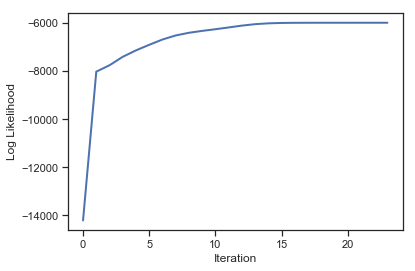

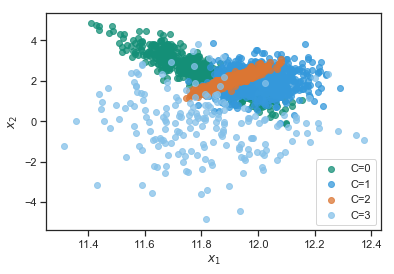

Correlation between x1 and x2: [-0.894262700271773, 0.03626336720359386, 0.9151233789602066, -0.05253892018496478]


In [251]:
# Exercise 4.4b

K = 4

pi, mu, sigma, gamma, log_likelihoods = expectation_maximization(data, K, early_stopping=True)

# *** Plotting ***
log_likelihood_range = range(0, len(log_likelihoods))
plt.plot(log_likelihood_range, log_likelihoods, linewidth=2, linestyle="-")
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.savefig('figure_4_4_b_log_likelihoods.png')
plt.show()
    
colors = ['#148F77', '#3498DB', '#DC7633', '#85C1E9']

plt.figure()
# 'Predictions' are just based on the responsibilities/gammas

for k, color in zip(range(K), colors):
    plt.scatter(data[np.argmax(gamma, 1)==k, 0], data[np.argmax(gamma, 1)==k, 1], alpha = 0.75, c=color, label='C=%d'%k)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figure_4_4_b_resp.png')
plt.show()


correlation = [sigma[k][0, 1] / np.sqrt(sigma[k][0, 0] * sigma[k][1, 1]) for k in range(0, K)]
print("Correlation between x1 and x2: {}".format(correlation))



In [257]:
percentage_of_drug_abuse = len(data[np.argmax(gamma, 1)==2,0])/N
print(percentage_of_drug_abuse)

0.212


In [258]:
# Exercise 4.5

samples = np.array([[11.85, 2.2, 0.5, 4.0],
                 [11.95, 3.1, 0.0, 1.0],
                 [12.00, 2.5, 0.0, 2.0],
                 [12.00, 3.0, 1.0, 6.3]])

likelihoods = np.zeros((len(samples), K))

for i in range(0, len(samples)):
    likelihood = [pi[k] * gaussian(samples[i], mu[k], sigma[k]) for k in range(0, K)]
    likelihood /= np.sum(likelihood)
    likelihoods[i] = likelihood

for i in range(len(likelihoods)):
    print("Likelihood for sample {}: {}".format(i, likelihoods[i]))


Likelihood for sample 0: [4.12081596e-01 5.81451502e-01 4.98335178e-04 5.96856647e-03]
Likelihood for sample 1: [9.17954224e-01 1.41990969e-05 2.87027450e-05 8.20028744e-02]
Likelihood for sample 2: [6.71823809e-05 3.24443556e-05 9.99884498e-01 1.58757605e-05]
Likelihood for sample 3: [1.28736925e-06 9.93178802e-01 4.62268466e-12 6.81991031e-03]
